This notebook is a simulation of 5000 ms of 400 independent descending commands following a gamma distribution with mean of 12 ms and order 10 and the Soleus muscle (800 motoneurons). Each descending command connects to approximately 30 % of the motor units. Also, a pool of 350 Renshaw cells is present.

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confMNPoolWithRenshawCells.rmto')
conf.simDuration_ms = 5000 # Here I change simulation duration without changing the Configuration file.

In [3]:
# Time vector for the simulation
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

membPotential = np.zeros_like(t, dtype = 'd')

In [4]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = NeuralTract(conf, 'CMExt')
pools[2] = InterneuronPool(conf, 'RC')

Syn = SynapsesFactory(conf, pools)

Motor Unit Pool SOL built
Descending Command CMExt built
Interneuron Pool of RC built
Synaptic Noise on RC built
All the 123980 synapses were built


In [5]:
tic = time.clock()
for i in xrange(0, len(t)-1):
    pools[1].atualizePool(t[i]) # NeuralTract
    pools[0].atualizeMotorUnitPool(t[i]) # MN pool
    pools[3].atualizePool(t[i]) # RC synaptic Noise
    pools[2].atualizeInterneuronPool(t[i]) # RC pool
toc = time.clock()
print str(toc - tic) + ' seconds'

16035.459765 seconds


In [6]:
pools[0].listSpikes()
pools[1].listSpikes()
pools[2].listSpikes()

The spike times of all descending commands along the 5000 ms of simulation is shown in Fig. \ref{fig:spikesDescRenshaw}.

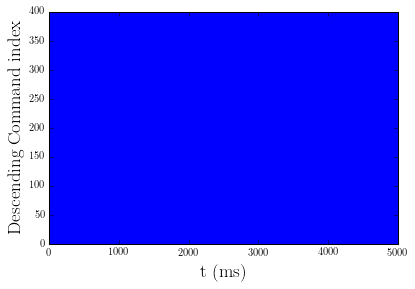

In [7]:
plt.figure()
plt.plot(pools[1].poolTerminalSpikes[:, 0],
         pools[1].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Descending Command index')

The spike times of the MNs along the 5000 ms of simulation is shown in Fig. \ref{fig:spikesMNRenshaw}.

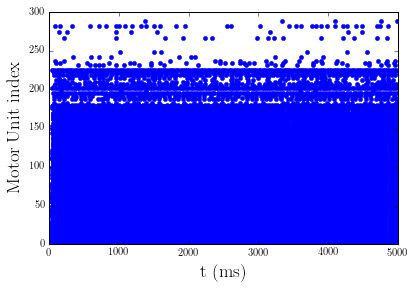

In [8]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

The spike times of the Renshaw cells along the 5000 ms of simulation is shown in Fig. \ref{fig:spikesRenshawRenshaw}.

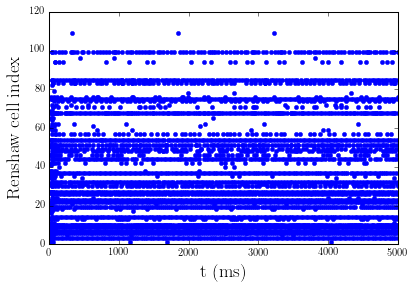

In [9]:
plt.figure()
plt.plot(pools[2].poolSomaSpikes[:, 0],
         pools[2].poolSomaSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Renshaw cell index')

The muscle force during the simulation \ref{fig:forceRenshaw}.

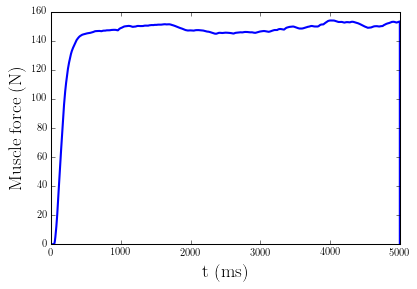

In [10]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle force (N)')